# Big Mart Sales

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [6]:
import warnings
warnings.simplefilter('ignore')

In [7]:
train = pd.read_csv("train.csv")

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis. Data Exploration and Preparation

1. Variable identification
2. Univariate analysis
3. Bi-variate analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

### 1. Variable Identification

1. Identify predictor and target variables;
2. Identify data type of the variables;
3. Identify category of the variables.

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### 1. Identify predictor and target variables.

**Predictor variables.**

* Item_Weight
* Item_Fat_Content
* Item_Visibility
* Item_Type
* Item_MRP
* Outlet_Establishment_Year
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

**Target variable.**

* Item_Outlet_Sales

#### 2. Identify data type of the variables.

**Character.**

* Item_Fat_Content
* Item_Type
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

**Numeric.**

* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales

#### 3. Identify categories of the variables.

**Categorical.**

* Item_Fat_Content
* Item_Type
* Outlet_Establishment_Year
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

**Continuous.**

* Item_Weight
* Item_Visibility
* Item_MRP
* Item_Outlet_Sales

### 2. Univariate Analysis

In [12]:
continuous_variables = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
categorical_variables = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 
                         'Outlet_Location_Type', 'Outlet_Type']

#### Continuous variables

In [13]:
train[continuous_variables].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


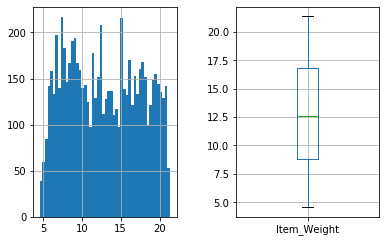

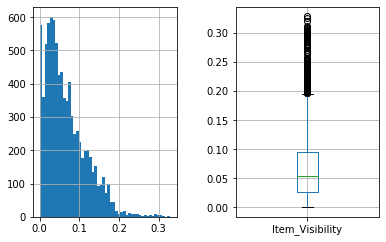

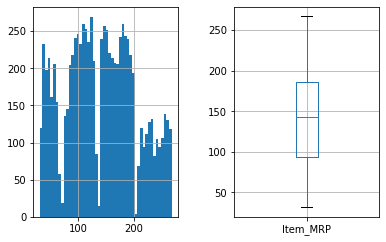

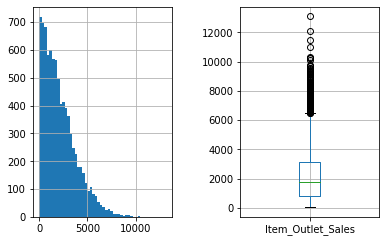

In [14]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

#### Categorical Variables

In [15]:
def analyze_categorical(variable, df):
    counts = pd.concat((df[variable].value_counts(), df[variable].value_counts(normalize=True)), 
              axis=1, keys=('Counts', 'Percentage'))
    print(counts)
    df[variable].value_counts().plot.bar()
    plt.show()

      Counts  Percentage
1985    1463    0.171653
1987     932    0.109351
1999     930    0.109117
1997     930    0.109117
2004     930    0.109117
2002     929    0.108999
2009     928    0.108882
2007     926    0.108647
1998     555    0.065118


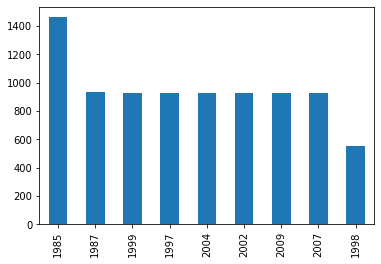

In [16]:
analyze_categorical('Outlet_Establishment_Year', train)

For Item_Fat_Content
         Counts  Percentage
Low Fat    5089    0.597090
Regular    2889    0.338965
LF          316    0.037076
reg         117    0.013728
low fat     112    0.013141


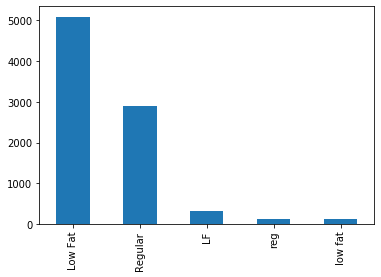

For Item_Type
                       Counts  Percentage
Fruits and Vegetables    1232    0.144550
Snack Foods              1200    0.140795
Household                 910    0.106770
Frozen Foods              856    0.100434
Dairy                     682    0.080019
Canned                    649    0.076147
Baking Goods              648    0.076030
Health and Hygiene        520    0.061011
Soft Drinks               445    0.052212
Meat                      425    0.049865
Breads                    251    0.029450
Hard Drinks               214    0.025109
Others                    169    0.019829
Starchy Foods             148    0.017365
Breakfast                 110    0.012906
Seafood                    64    0.007509


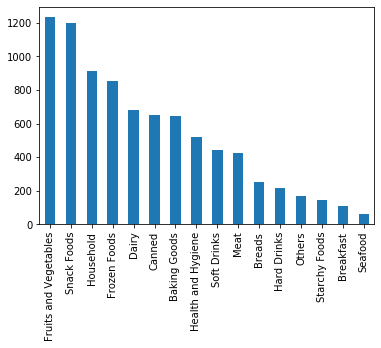

For Outlet_Establishment_Year
      Counts  Percentage
1985    1463    0.171653
1987     932    0.109351
1999     930    0.109117
1997     930    0.109117
2004     930    0.109117
2002     929    0.108999
2009     928    0.108882
2007     926    0.108647
1998     555    0.065118


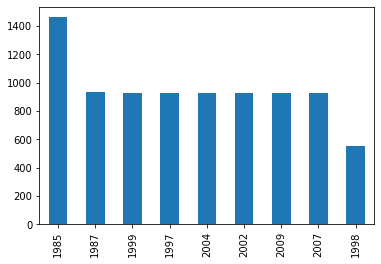

For Outlet_Size
        Counts  Percentage
Medium    2793    0.456895
Small     2388    0.390643
High       932    0.152462


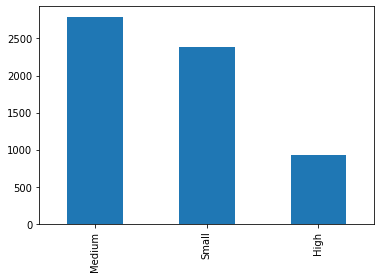

For Outlet_Location_Type
        Counts  Percentage
Tier 3    3350    0.393054
Tier 2    2785    0.326763
Tier 1    2388    0.280183


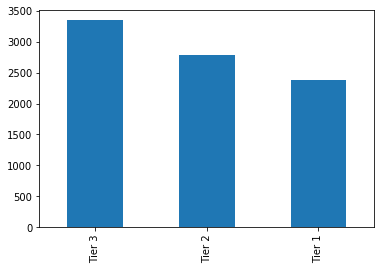

For Outlet_Type
                   Counts  Percentage
Supermarket Type1    5577    0.654347
Grocery Store        1083    0.127068
Supermarket Type3     935    0.109703
Supermarket Type2     928    0.108882


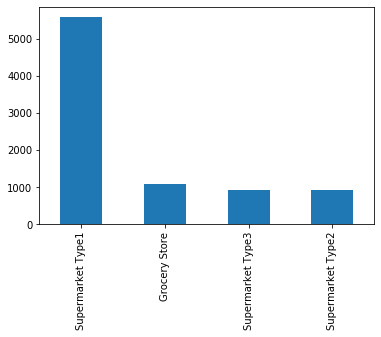

In [17]:
for variable in categorical_variables:
    print(f'For {variable}')
    analyze_categorical(variable, train)

As we can observe from the frequency table for the variable Item_Fat_Content, we only have two categories: low fat and regular. We have to standardize the names.

In [18]:
train = train.apply(pd.Series.replace, to_replace="LF", value="Low Fat")

In [19]:
train = train.apply(pd.Series.replace, to_replace="low fat", value="Low Fat")

In [20]:
train = train.apply(pd.Series.replace, to_replace="reg", value="Regular")

In [21]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 3. Bi-variate Analysis

#### Continuous and continuous

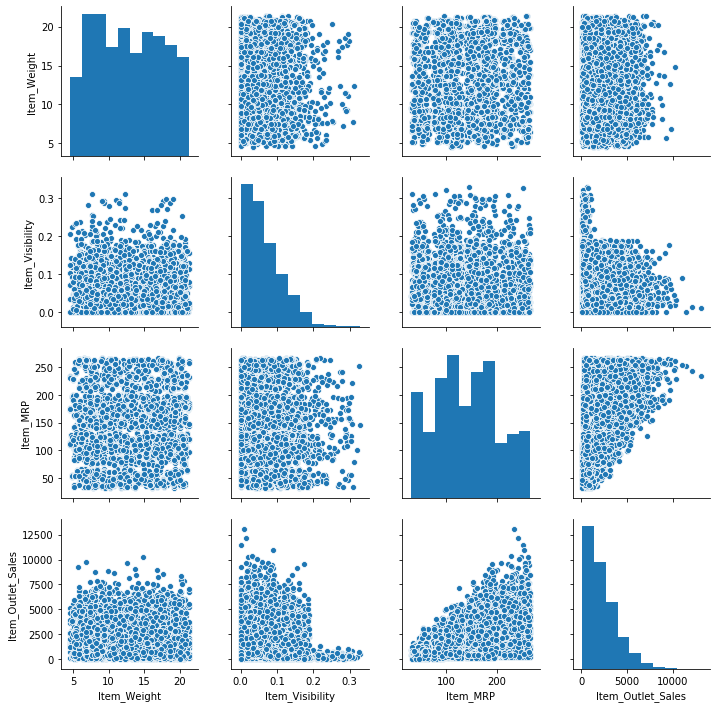

In [22]:
sns.pairplot(train[continuous_variables]);

In [23]:
train[continuous_variables].corr(method="pearson")

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


#### Categorical and categorical

In [24]:
def generate_two_way_data(cat1, cat2, df):
    gender_table = pd.crosstab(index=df[cat1],
                               columns=df[cat2],
                               normalize="index")
    print(gender_table)
    gender_table.plot(kind="bar", figsize=(4,4), stacked=False);
    plt.show();

In [25]:
item_fat_type_table = pd.crosstab(index=train['Item_Fat_Content'],
                           columns=train['Item_Type'])
item_fat_type_table

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


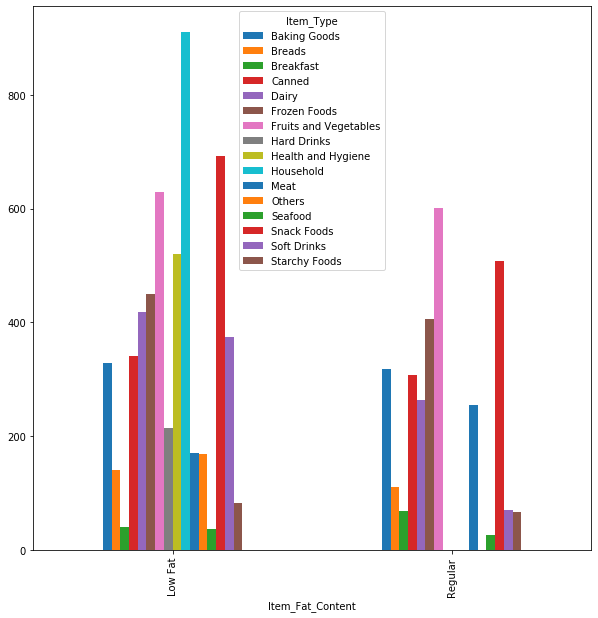

In [26]:
item_fat_type_table.plot(kind="bar", figsize=(10,10), stacked=False);

Outlet_Size                High    Medium     Small
Item_Type                                          
Baking Goods           0.157667  0.438445  0.403888
Breads                 0.139665  0.463687  0.396648
Breakfast              0.164557  0.455696  0.379747
Canned                 0.138004  0.460722  0.401274
Dairy                  0.161290  0.439516  0.399194
Frozen Foods           0.149593  0.445528  0.404878
Fruits and Vegetables  0.160815  0.467724  0.371461
Hard Drinks            0.155405  0.506757  0.337838
Health and Hygiene     0.166213  0.463215  0.370572
Household              0.158706  0.445300  0.395994
Meat                   0.132686  0.482201  0.385113
Others                 0.130081  0.422764  0.447154
Seafood                0.108696  0.456522  0.434783
Snack Foods            0.144009  0.470046  0.385945
Soft Drinks            0.157051  0.439103  0.403846
Starchy Foods          0.180952  0.457143  0.361905


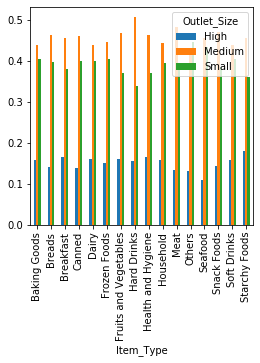

In [27]:
generate_two_way_data('Item_Type', 'Outlet_Size', train)

In [28]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = np.array(item_fat_type_table)
print(table)

stat, p, dof, expected = chi2_contingency(table)
print("dof=%d" % dof)
print(expected)

# interpret test statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print("probability=%.3f, critical=%.3f, stat=%.3f" % (prob, critical, stat))

if abs(stat) >= critical:
    print("Dependent (reject H0)")
else:
    print("Independent (failt to reject H0)")
    
# interpret p-value
alpha = 1.0 - prob
print("significance=%.3f, p=%.3f" % (alpha, p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (failt to reject H0)")

[[329 140  41 341 418 450 630 214 520 910 170 169  37 692 374  82]
 [319 111  69 308 264 406 602   0   0   0 255   0  27 508  71  66]]
dof=15
[[419.45512144 162.47412883  71.20380148 420.10242872 441.46356917
  554.09503696 797.48257656 138.52375924 336.59978881 589.04963041
  275.10559662 109.39493136  41.42766631 776.7687434  288.05174234
   95.80147835]
 [228.54487856  88.52587117  38.79619852 228.89757128 240.53643083
  301.90496304 434.51742344  75.47624076 183.40021119 320.95036959
  149.89440338  59.60506864  22.57233369 423.2312566  156.94825766
   52.19852165]]
probability=0.950, critical=24.996, stat=1509.001
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [29]:
def report_chi_squared_test(cat1, cat2, df):
    # calculate contingency table for the two categorical variables
    table = pd.crosstab(index=df[cat1],
                           columns=df[cat2])
    stat, p, dof, expected = chi2_contingency(table)
    # interpret test statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print("probability=%.3f, critical=%.3f, stat=%.3f" % (prob, critical, stat))

    if abs(stat) >= critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (failt to reject H0)")

    # interpret p-value
    alpha = 1.0 - prob
    print("significance=%.3f, p=%.3f" % (alpha, p))
    if p <= alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (failt to reject H0)")

In [30]:
report_chi_squared_test('Item_Fat_Content', 'Outlet_Size', train)

probability=0.950, critical=5.991, stat=0.189
Independent (failt to reject H0)
significance=0.050, p=0.910
Independent (failt to reject H0)


In [31]:
report_chi_squared_test('Item_Type', 'Outlet_Type', train)

probability=0.950, critical=61.656, stat=21.358
Independent (failt to reject H0)
significance=0.050, p=0.999
Independent (failt to reject H0)


#### Categorical and continuous

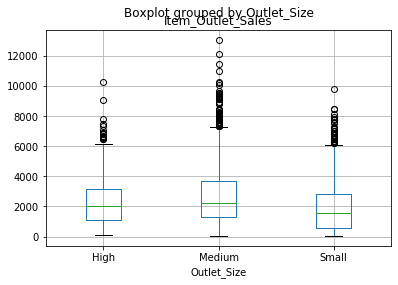

In [32]:
train.boxplot(by="Outlet_Size", column=["Item_Outlet_Sales"]);

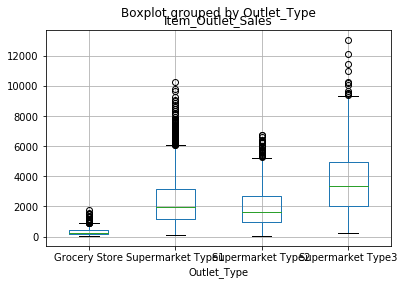

In [33]:
train.boxplot(by="Outlet_Type", column=["Item_Outlet_Sales"]);

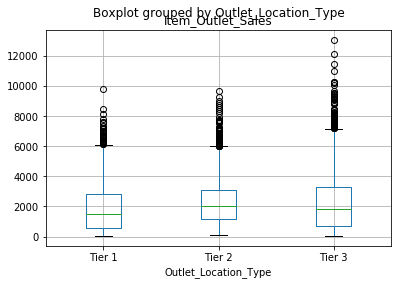

In [34]:
train.boxplot(by="Outlet_Location_Type", column=["Item_Outlet_Sales"]);

### 4. Missing Values Treatment

In [35]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [37]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].value_counts().index[0])

In [38]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

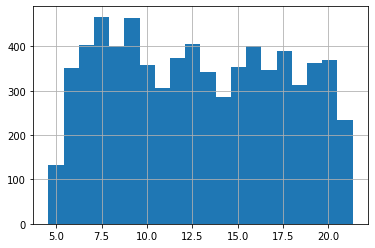

In [39]:
train['Item_Weight'].hist(bins=20);

In [40]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [41]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 5. Outlier Treatment

In [42]:
train['Item_Visibility'] = np.log(train['Item_Visibility'] + 1)

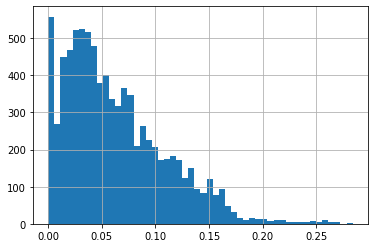

In [43]:
train['Item_Visibility'].hist(bins=50);

### 6. Feature Engineering

In [44]:
train = pd.get_dummies(train, columns=["Outlet_Size"])

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,0,1,0
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,0,1,0
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,0,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,0,1,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,1,0,0


## Predict sales

In [46]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 
            'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size_High', 'Outlet_Size_Medium', 
            'Outlet_Size_Small']
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size_High', 'Outlet_Size_Medium', 
                      'Outlet_Size_Small'] 
target = ['Item_Outlet_Sales']

In [47]:
X = train[numerical_features]
y = train[target]

In [48]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,9.30,0.015920,249.8092,0,1,0
1,5.92,0.019095,48.2692,0,1,0
2,17.50,0.016621,141.6180,0,1,0
3,19.20,0.000000,182.0950,0,1,0
4,8.93,0.000000,53.8614,1,0,0


In [49]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
y_train.shape

(6818, 1)

In [60]:
y_val.shape

(1705, 1)

In [61]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print("Intercept: ", reg.intercept_)
print("Coefficients: ", reg.coef_)

Intercept:  [259.66494062]
Coefficients:  [[-2.61365886e+00 -4.22741820e+03  1.55693850e+01  9.41790671e+01
   1.47598689e+02 -2.41777756e+02]]


In [63]:
y_pred = reg.predict(X_val)

In [75]:
X_val.iloc[:,1:2].shape

(1705, 1)

In [72]:
y_val.shape

(1705, 1)